In [1]:
from argparse import Namespace
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
args = Namespace(
    data_size = 200,
    train_ratio = 0.8,
    epoches = 301,
    batch_size = 40,
)

In [3]:
def create_data(data_size=200, train_ratio=0.8):
    np.random.seed(1337)
    train_data_size = int(data_size * train_ratio)

    X = np.linspace(-1, 1, data_size)
    np.random.shuffle(X)
    Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (data_size, ))
    
    X_train, Y_train = X[:train_data_size], Y[:train_data_size]
    X_test, Y_test = X[train_data_size:], Y[train_data_size:]
    return X_train, Y_train, X_test, Y_test

In [4]:
def plot_data(X, Y):
    plt.scatter(X, Y)
    plt.show()

In [5]:
def model():
    model = Sequential()
    model.add(Dense(output_dim=1, input_dim=1))
    # model.add(Dense(output_dim=1))  # input_dim is default to 1 layer's output
    return model

In [6]:
def train(model, args, X_train, Y_train):
    print('\nTraining--------')
    for step in range(args.epoches):
        cost = model.train_on_batch(X_train, Y_train)
        if step % 100 == 0:
            print('train cost:', cost)
    return model

In [7]:
def test(model, args, X_test, Y_test):
    print('\nTesting--------')
    cost = model.evaluate(X_test, Y_test, batch_size=args.batch_size)
    print('\ntest cost:', cost)
    W, b = model.layers[0].get_weights()
    print('Wrights=', W, '\nbiases=', b)
    
    return model

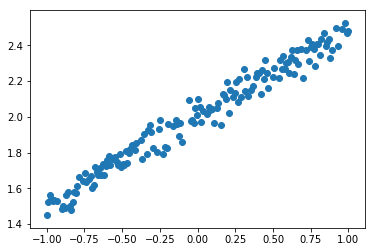

In [8]:
X_train, Y_train, X_test, Y_test = create_data(args.data_size, args.train_ratio)
plot_data(X_train, Y_train)

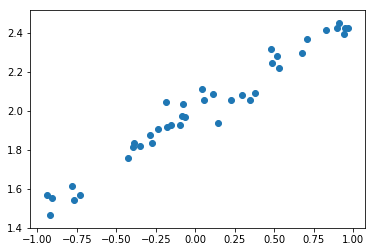

Instructions for updating:
Colocations handled automatically by placer.

Training--------
Instructions for updating:
Use tf.cast instead.


/home/texuanw/softwares/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


train cost: 4.0225005
train cost: 0.073238626
train cost: 0.00386274
train cost: 0.002643449

Testing--------
40/40 [==============================] - 0s 321us/step

test cost: 0.0031367032788693905
Wrights= [[0.4922711]] 
biases= [1.9995022]


In [9]:
model = model()
model.compile(loss='mse', optimizer='sgd')
model = train(model, args, X_train, Y_train)
model = test(model, args, X_test, Y_test)

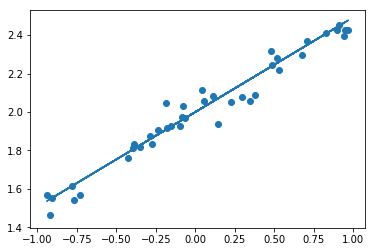

In [15]:
Y_pred = model.predict(X_test)

plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, '-')
plt.show()